In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias.html

In [2]:
filename = 'covid19-es-and.csv'
fecha = '10/04/2020'
url = 'https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias/detalle/234422.html'

In [3]:
# Load
tables = pd.read_html(url, header=0, thousands='.')
assert len(tables) > 0
dfL = tables[0]
dfL.set_index(['Provincia'], inplace=True)
dfL

,Positivo,Casos que han precisado hospitalización,Casos que han precisado ingreso UCI,Fallecimientos,Curados
Provincia,,,,,
Almería,400,169,33,29,73
Cádiz,929,413,64,49,144
Córdoba,1116,439,54,48,159
Granada,1686,890,102,148,251
Huelva,310,165,26,21,48
Jaén,1055,557,56,92,111
Málaga,2127,1182,123,154,451
Sevilla,1887,900,124,150,200
Total,9510,4715,582,691,1437


In [4]:
# Prepare
provincias = ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla', 'Total']
dfP = pd.DataFrame(0, index=provincias, columns=['Ingresados','Altas', 'Bajas'])

dfP['Ingresados'] = dfL['Casos que han precisado hospitalización']
dfP['Altas'] = dfL['Curados']
dfP['Bajas'] = dfL['Fallecimientos']
dfP['Fecha'] = fecha

dfP

,Ingresados,Altas,Bajas,Fecha
Almería,169,73,29,10/04/2020
Cádiz,413,144,49,10/04/2020
Córdoba,439,159,48,10/04/2020
Granada,890,251,148,10/04/2020
Huelva,165,48,21,10/04/2020
Jaén,557,111,92,10/04/2020
Málaga,1182,451,154,10/04/2020
Sevilla,900,200,150,10/04/2020
Total,4715,1437,691,10/04/2020


In [5]:
# Save to csv
dfP.to_csv(filename, encoding='utf-8', header=False, mode='+a', index_label='Provincia')

In [6]:
# Load full csv
dfCSV = pd.read_csv(filename, index_col='Provincia', thousands='.')

In [7]:
# Select & calc
title = 'COVID19 Andalucía'
total = dfCSV.loc['Total']['Ingresados'].pct_change() * 100
huelva = dfCSV.loc['Huelva']['Ingresados'].pct_change() * 100
malaga  = dfCSV.loc['Málaga']['Ingresados'].pct_change() * 100
# x Axis
xA = dfCSV.loc['Total']['Fecha']

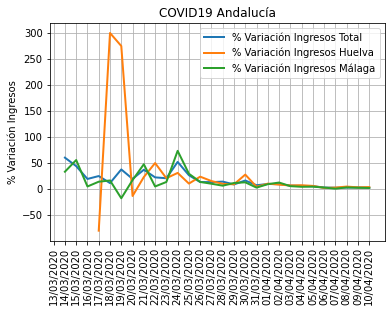

In [8]:
# Draw 
plt.plot(xA, total, label='% Variación Ingresos Total', linewidth=2)
plt.plot(xA, huelva, label='% Variación Ingresos Huelva', linewidth=2)
plt.plot(xA, malaga, label='% Variación Ingresos Málaga', linewidth=2)
plt.title(title)
plt.ylabel('% Variación Ingresos')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

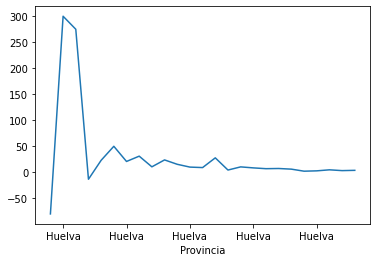

In [9]:
huelva.plot()

In [10]:
huelva.tail()

Provincia
Huelva    2.142857
Huelva    2.797203
Huelva    4.761905
Huelva    3.246753
Huelva    3.773585
Name: Ingresados, dtype: float64